# Multiclass_classification

## Importing the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## importing the DataSet

In [2]:
df_raw= pd.read_csv('winequality-red.csv')
df = df_raw.copy()

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## EDA

In [8]:
#sns.pairplot(df)

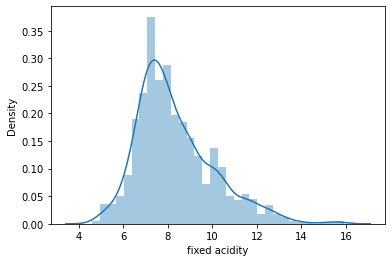

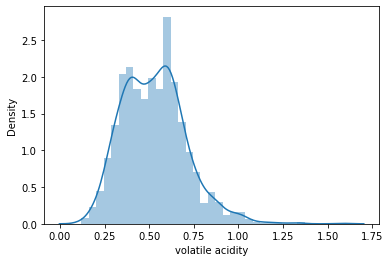

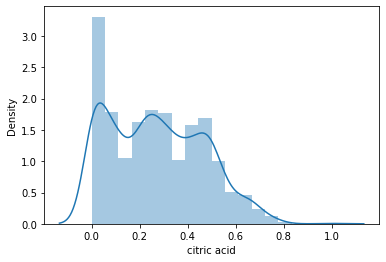

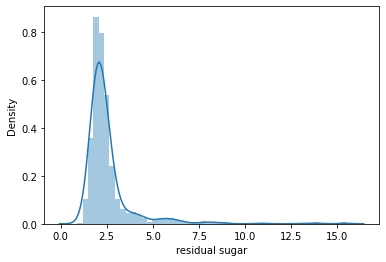

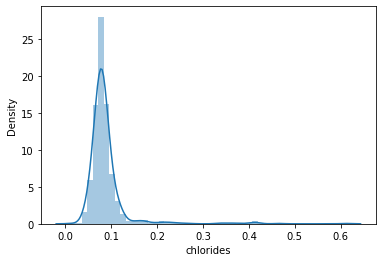

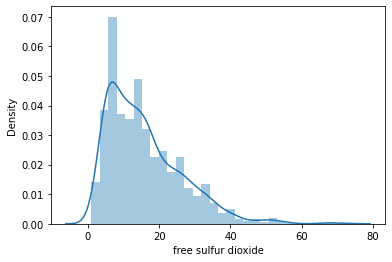

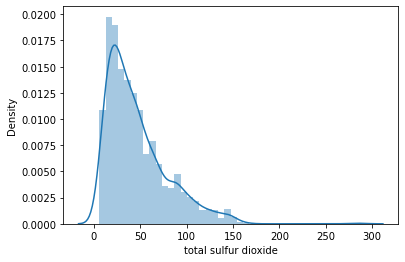

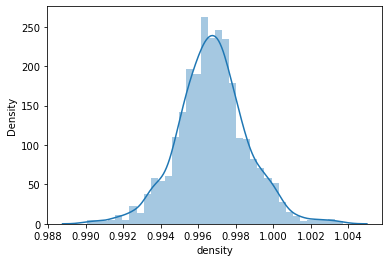

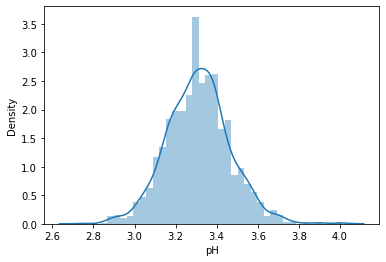

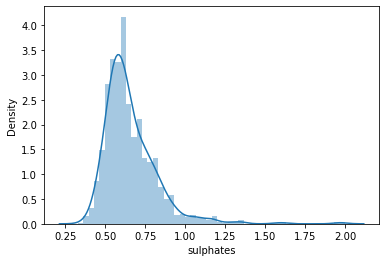

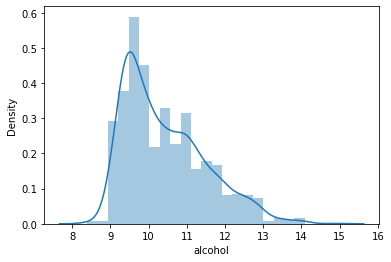

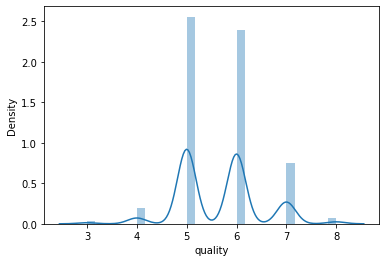

In [9]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

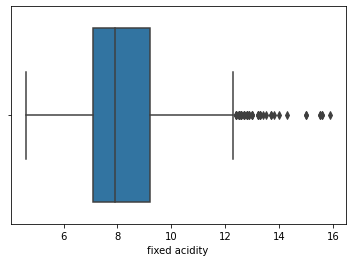

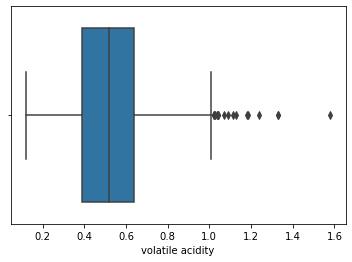

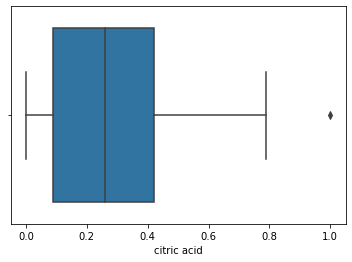

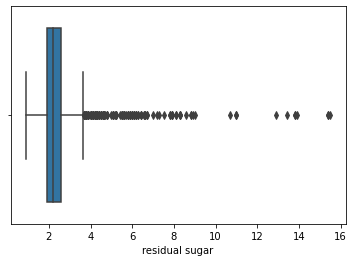

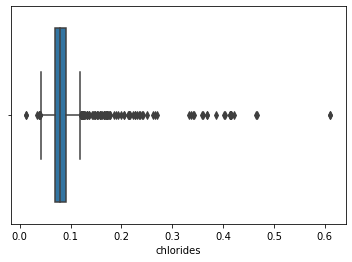

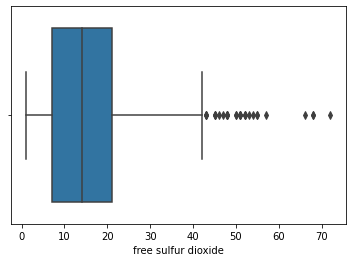

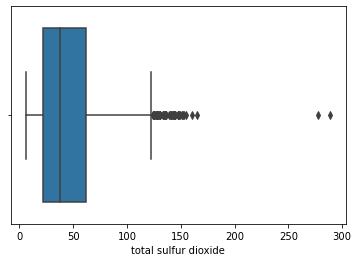

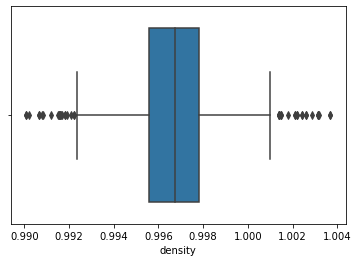

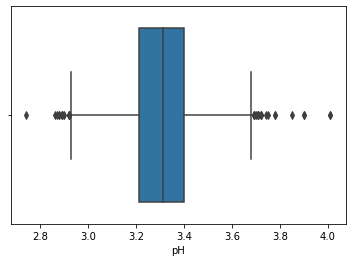

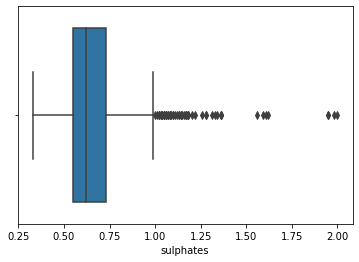

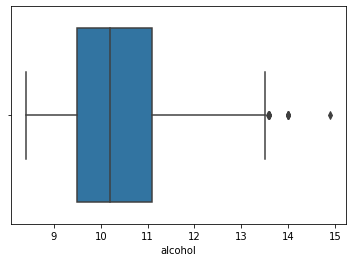

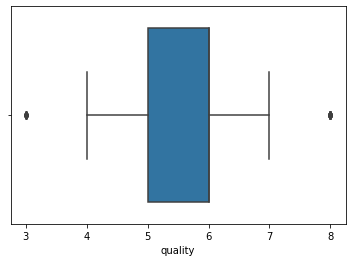

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

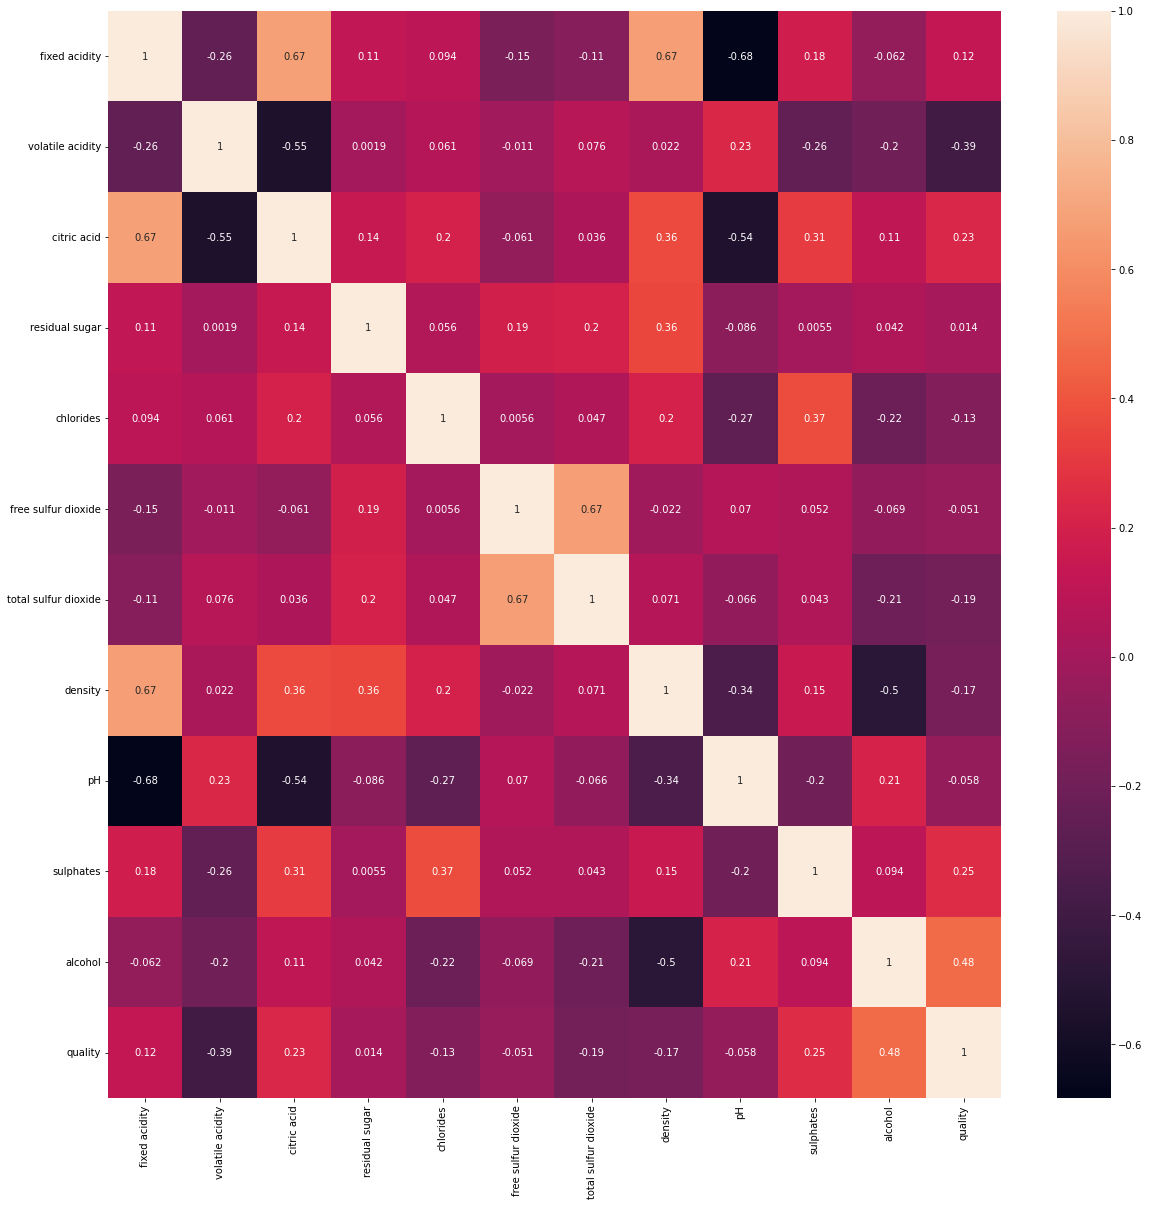

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

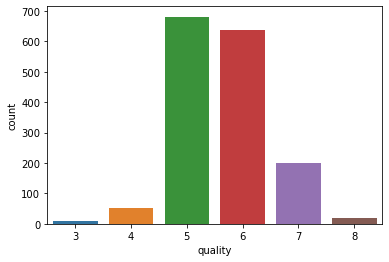

In [12]:
sns.countplot(df['quality'])

## Splitting Data

In [13]:
X= df.drop('quality',axis=1)
y=df['quality']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
X.shape

(1599, 11)

In [17]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()

In [19]:
X_train=Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)

## Model Preparation

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
model = Sequential()

model.add(Dense(11,activation='relu'))

model.add(Dense(6,activation='relu'))

model.add(Dense(3,activation='relu'))

model.add(Dense(6,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.fit(x=X_train,y=y_train,epochs=500,batch_size=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/500
37/37 [==============================] - 1s 9ms/step - loss: 2.1951 - accuracy: 0.4253 - val_loss: 2.1284 - val_accuracy: 0.4125
Epoch 2/500
37/37 [==============================] - 0s 4ms/step - loss: 1.9770 - accuracy: 0.4292 - val_loss: 1.8432 - val_accuracy: 0.4125
Epoch 3/500
37/37 [==============================] - 0s 4ms/step - loss: 1.6401 - accuracy: 0.4292 - val_loss: 1.5117 - val_accuracy: 0.4125
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 1.3947 - accuracy: 0.4292 - val_loss: 1.3571 - val_accuracy: 0.4125
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 1.2895 - accuracy: 0.4363 - val_loss: 1.2962 - val_accuracy: 0.4531
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 1.2366 - accuracy: 0.5106 - val_loss: 1.2655 - val_accuracy: 0.4812
Epoch 7/500
37/37 [==============================] - 0s 4ms/step - loss: 1.2011 - accuracy: 0.5262 - val_loss: 1.2424 - val_accuracy: 0.4781
Epoch 8/500
3

<AxesSubplot:>

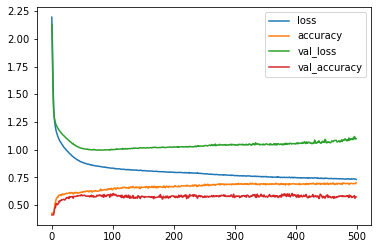

In [36]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [25]:
predictions = model.predict(X_test)
#print(classification_report(y_test,predictions))
print('\n')
#print(confusion_matrix(y_test, predictions.round()))
print('\n')
#print(accuracy_score(y_test, predictions.round()))
print('\n')
#accuracy = accuracy_score(y_test, predictions.round())
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
#print ('ROC AUC Score',roc_auc_score(y_test,predictions.round()))

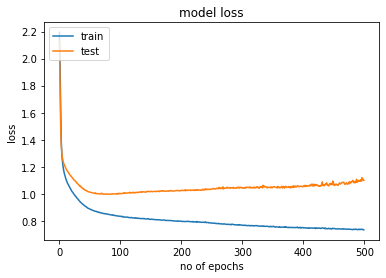

In [37]:
plt.plot(loss['loss'])
plt.plot(loss['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

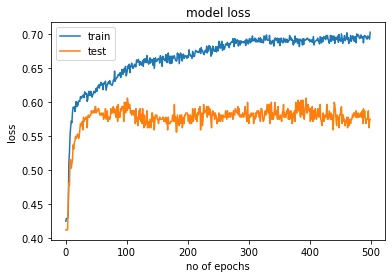

In [38]:
plt.plot(loss['accuracy'])
plt.plot(loss['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [41]:
#input for 11 features
Xnew = np.array([[7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4]])

#Xnew = np.array([[8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8]])

#convert into numpy array
Xnew = np.array(Xnew, dtype=np.float64)

#making the prediction
Ynew = model.predict(Xnew)

print(Ynew)

max_index_row = np.argmax(Ynew, axis=1)
print(max_index_row)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5800306e-28
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
[5]


In [42]:
# Save Model

model.save('wine_quality_model.h5')